# Predicting Prediabetes Risk Using Machine Learning in Bangladesh

In [1]:
# STEP 1: Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# STEP 2: Load the preprocessed dataset
df = pd.read_excel("../data/Preprocessed_Diabetes_Data.xlsx")
df.head()

,Age,Gender,Gestational_Diabetes,Marital_Status,Family_Income,Education,Occupation,Residence,District,Family_History,High_Blood_Pressure,Physically_Active,Height,Weight_Status,Height_cm,Weight_kg,Risk_Score,Risk_Category
0,50-59 Years,Male,0.0,Married,">50,000BDT",Higher Secondary,Business,Rural,Dhaka,1.0,1.0,1.0,5’5’’ (165cm),189-226 lbs. (86-102kg),165.0,94.0,5,High Risk (≥5)
1,Less than 40 Years,Male,NaN,Unmarried,"20,000-50,000 BDT",Undergraduate,Student,Urban,Noakhali,1.0,0.0,1.0,5’10’’ (178cm),189-226 lbs. (86-102kg),178.0,94.0,2,Low Risk (<5)
2,Less than 40 Years,Female,0.0,Unmarried,"20,000-50,000 BDT",Undergraduate,Unemployed,Urban,Comilla,1.0,0.0,1.0,4’11’’ (150cm),<189 lbs. (86kg),150.0,86.0,1,Low Risk (<5)
3,Less than 40 Years,Female,0.0,Unmarried,"20,000-50,000 BDT",Undergraduate,Lecturer,Rural,Comilla,1.0,0.0,1.0,5’0’’ (152cm),<189 lbs. (86kg),152.0,86.0,1,Low Risk (<5)
4,Less than 40 Years,Male,NaN,Unmarried,">50,000BDT",Undergraduate,Student,Semi-urban,Pabna,0.0,0.0,0.0,5’8’’ (173cm),189-226 lbs. (86-102kg),173.0,94.0,2,Low Risk (<5)


In [3]:
# STEP 3: Drop rows with missing essential features
df = df.dropna(subset=['Height_cm', 'Weight_kg'])

In [4]:
# STEP 4: Encode categorical variables
categorical_cols = ['Age', 'Gender', 'Marital_Status', 'Family_Income', 
                    'Education', 'Occupation', 'Residence', 'District']

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [7]:
# STEP 5: Define features and target
features = ['Age', 'Gender', 'Marital_Status', 'Family_Income', 'Education',
            'Occupation', 'Residence', 'District', 'Gestational_Diabetes',
            'Family_History', 'High_Blood_Pressure', 'Physically_Active',
            'Height_cm', 'Weight_kg']

X = df[features]
y = df['Risk_Category'].map({'Low Risk (<5)': 0, 'High Risk (≥5)': 1})

In [8]:
X.head()

,Age,Gender,Marital_Status,Family_Income,Education,Occupation,Residence,District,Gestational_Diabetes,Family_History,High_Blood_Pressure,Physically_Active,Height_cm,Weight_kg
0,1,1,0,2,1,58,0,13,0.0,1.0,1.0,1.0,165.0,94.0
1,3,1,1,0,5,531,2,47,NaN,1.0,0.0,1.0,178.0,94.0
2,3,0,1,0,5,584,2,11,0.0,1.0,0.0,1.0,150.0,86.0
3,3,0,1,0,5,299,0,11,0.0,1.0,0.0,1.0,152.0,86.0
4,3,1,1,2,5,532,1,48,NaN,0.0,0.0,0.0,173.0,94.0


In [9]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Risk_Category, dtype: int64

In [10]:
# STEP 6: Handle missing values with imputation (mean strategy)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

In [11]:
X.head()

,Age,Gender,Marital_Status,Family_Income,Education,Occupation,Residence,District,Gestational_Diabetes,Family_History,High_Blood_Pressure,Physically_Active,Height_cm,Weight_kg
0,1.0,1.0,0.0,2.0,1.0,58.0,0.0,13.0,0.000000,1.0,1.0,1.0,165.0,94.0
1,3.0,1.0,1.0,0.0,5.0,531.0,2.0,47.0,0.157747,1.0,0.0,1.0,178.0,94.0
2,3.0,0.0,1.0,0.0,5.0,584.0,2.0,11.0,0.000000,1.0,0.0,1.0,150.0,86.0
3,3.0,0.0,1.0,0.0,5.0,299.0,0.0,11.0,0.000000,1.0,0.0,1.0,152.0,86.0
4,3.0,1.0,1.0,2.0,5.0,532.0,1.0,48.0,0.157747,0.0,0.0,0.0,173.0,94.0


Class distribution before SMOTE: Counter({0: 4688, 1: 313})


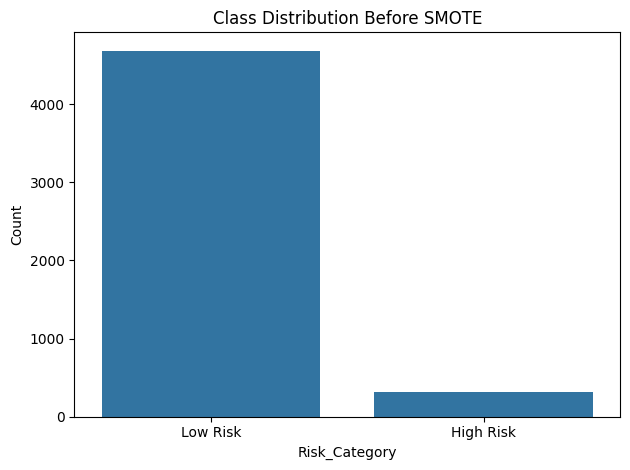

In [12]:
# STEP 7: Check imbalance before SMOTE
print("Class distribution before SMOTE:", Counter(y))
sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE")
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
# STEP 8: Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# STEP 9: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# STEP 10: Apply SMOTE to balance training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

Class distribution after SMOTE: Counter({0: 3741, 1: 3741})


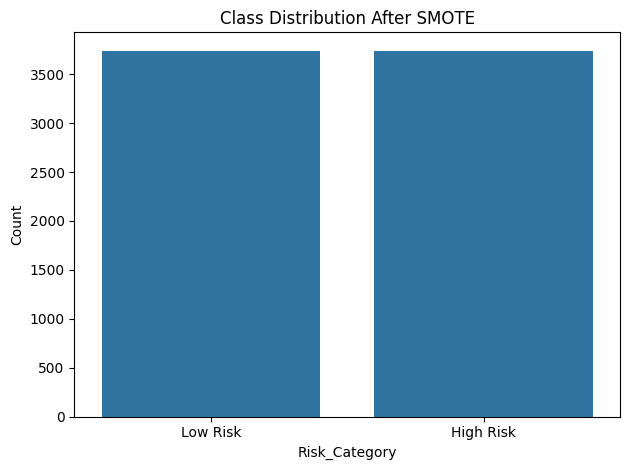

In [16]:
# Visualize class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_balanced))
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After SMOTE")
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [17]:
# STEP 11: Train and evaluate multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

    print(f"\n{name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest
Confusion Matrix:
 [[945   2]
 [  2  52]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       0.96      0.96      0.96        54

    accuracy                           1.00      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       1.00      1.00      1.00      1001


Logistic Regression
Confusion Matrix:
 [[852  95]
 [  7  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       947
           1       0.33      0.87      0.48        54

    accuracy                           0.90      1001
   macro avg       0.66      0.89      0.71      1001
weighted avg       0.96      0.90      0.92      1001


Decision Tree
Confusion Matrix:
 [[941   6]
 [  4  50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.9

In [18]:
# STEP 12: Compare model performance visually
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.996004,0.962963,0.962963,0.962963
2,Decision Tree,0.990010,0.892857,0.925926,0.909091
3,Support Vector Machine,0.987013,0.815385,0.981481,0.890756
1,Logistic Regression,0.898102,0.330986,0.870370,0.479592
4,Naive Bayes,0.902098,0.335821,0.833333,0.478723


<Figure size 1200x700 with 0 Axes>

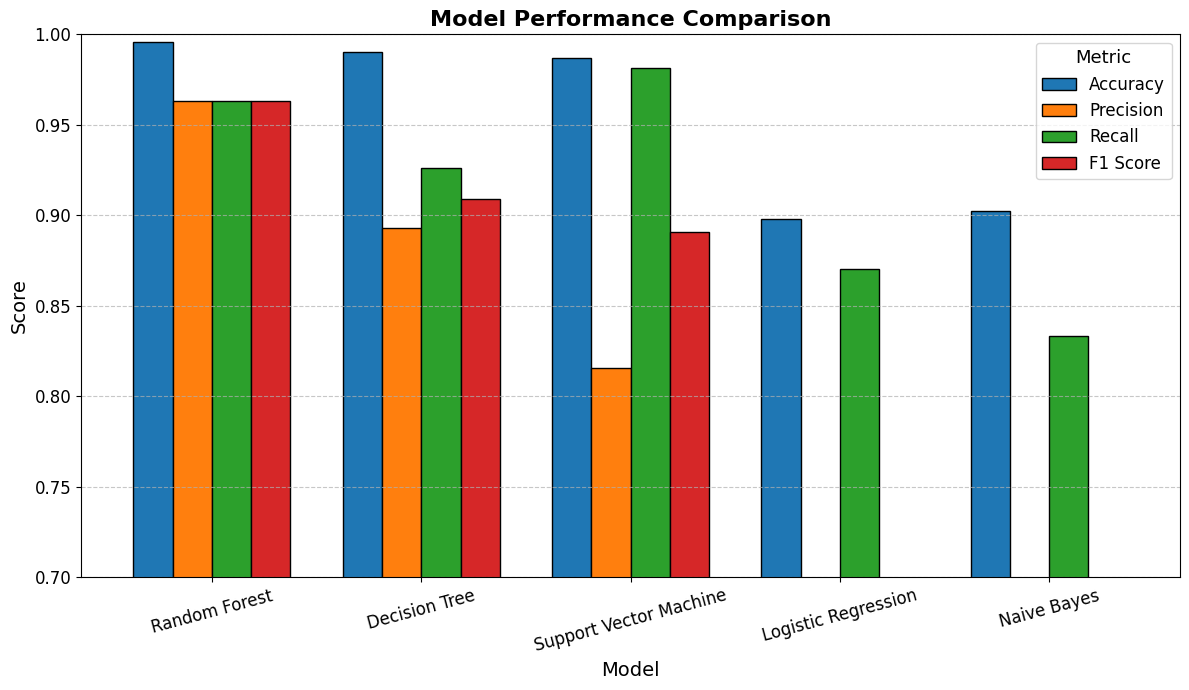

In [19]:
# Set a publication-style font and figure settings
plt.figure(figsize=(12, 7))
ax = results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', edgecolor='black', width=0.75, figsize=(12, 7)
)

plt.title("Model Performance Comparison", fontsize=16, weight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Metric", title_fontsize=13, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# STEP 13: Train the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# STEP 14: Evaluate the model
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[947   0]
 [  4  50]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       947
           1       1.00      0.93      0.96        54

    accuracy                           1.00      1001
   macro avg       1.00      0.96      0.98      1001
weighted avg       1.00      1.00      1.00      1001



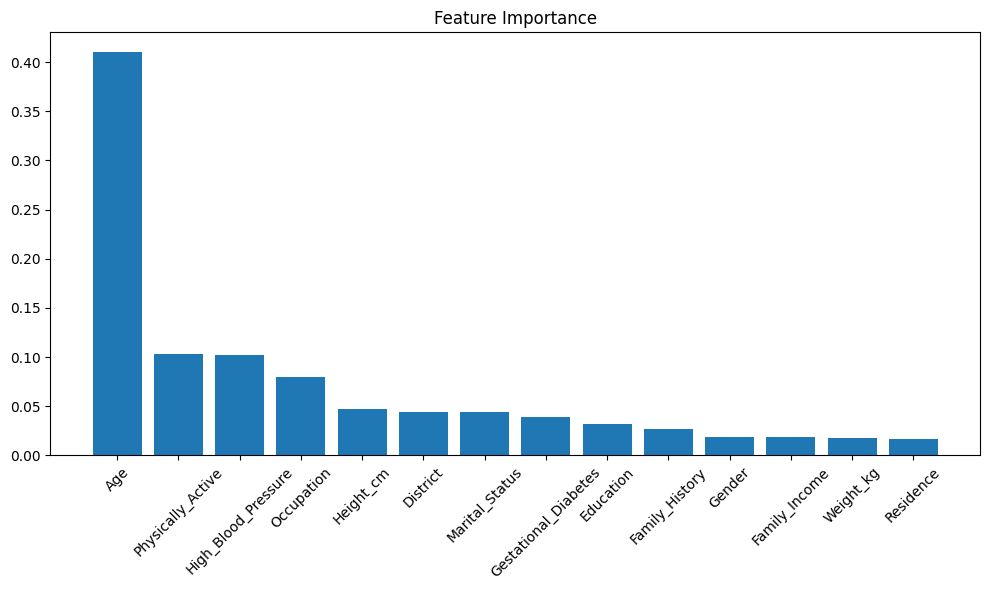

In [22]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()